# Part I - Prosper Loan Data Exploration
## by Elie Kibwe Mwalindomba

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, interest rate, current loan status, borrower income, and many others.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loadind the dataset

In [2]:
loans_df = pd.read_csv('prosperLoanData.csv')
loans_df.sample(4)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
28250,639835959075553830FFE66,1014796,2013-11-22 19:54:54.007000000,NaN,36,Completed,2014-02-07 00:00:00,0.34588,0.3059,0.2959,...,-3.48,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
13339,D7BC3425783450703D304C8,360961,2008-07-02 08:43:59.790000000,D,36,Completed,2011-07-09 00:00:00,0.16309,0.1415,0.1315,...,-24.75,0.0,0.0,0.0,0.0,1.0,0,0,0.0,29
27868,150C36020608311766A79D2,1154515,2014-02-11 11:10:15.467000000,NaN,36,Current,NaN,0.31709,0.2774,0.2674,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,114
67521,FA72350718719064425BBFD,494302,2011-02-17 11:07:00.830000000,NaN,36,Completed,2012-10-29 00:00:00,0.10993,0.0890,0.0790,...,-69.92,0.0,0.0,0.0,0.0,1.0,0,0,0.0,147


In [3]:
# high-level overview of data shape and variable types
print(loans_df.shape)
print(loans_df.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


### What is the structure of your dataset?

The shape shows us that the dataset has 113,937 records or rows and 81 variables or columns.
Most of the variables are numeric, but we can also see status (LoanStatus), numeric or alphanumeric rank (ProsperRating (numeric), ProsperRating (Alpha), ProsperScore), level (CreditGrade) or category (ListingCategory) variables.


### What is/are the main feature(s) of interest in your dataset?

The main features of interest are:
The current status of the loan, the borrower's interest rate and the category of the ad that the borrower selected when posting their ad. 
**LoanStatus, BorrowerRate and ListingCategory**

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I'm most interested in figuring out what features are best placed to affect a loan’s outcome status, what are best placed to affects the borrower’s interest rate. One of the questions is : Are there differences between loans depending on how large the original loan amount was?


> Let's start with a little data assessment and also cleaning if necessary. Then we will explore the most important variables as we go along.
We will keep only about twenty columns on which we will concentrate our analysis. 

In [4]:
to_keep =['ListingKey','CreditGrade','LoanNumber','Term','LoanStatus','BorrowerRate','ProsperScore','ListingCategory (numeric)',
'EmploymentStatus','IsBorrowerHomeowner','IncomeRange','StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationDate',
'LoanOriginationQuarter','MonthlyLoanPayment','OpenRevolvingAccounts','CurrentDelinquencies',
'AmountDelinquent','DebtToIncomeRatio','TotalProsperLoans','LoanCurrentDaysDelinquent','Investors']

In [5]:
all_col = list(loans_df)

In [6]:
## Let's delete the others
to_delete = []
for col in all_col:
    if col not in to_keep:
        to_delete.append(col)
        
loans_df.drop(columns=to_delete, inplace=True)

In [7]:
(list(loans_df))

['ListingKey',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'BorrowerRate',
 'ProsperScore',
 'ListingCategory (numeric)',
 'EmploymentStatus',
 'IsBorrowerHomeowner',
 'OpenRevolvingAccounts',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DebtToIncomeRatio',
 'IncomeRange',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'LoanCurrentDaysDelinquent',
 'LoanNumber',
 'LoanOriginalAmount',
 'LoanOriginationDate',
 'LoanOriginationQuarter',
 'MonthlyLoanPayment',
 'Investors']

In [8]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
ListingKey                   113937 non-null object
CreditGrade                  28953 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerRate                 113937 non-null float64
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
OpenRevolvingAccounts        113937 non-null int64
CurrentDelinquencies         113240 non-null float64
AmountDelinquent             106315 non-null float64
DebtToIncomeRatio            105383 non-null float64
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
TotalProsperLoans            22085 non-null float64
LoanCurrentDaysDelinquent    113937 non-null int64
LoanNum

In [9]:
loans_df.duplicated().sum()

0

In [10]:
## Let's reorder this dataset
loans_df = loans_df[to_keep]

In [11]:
# convert LoanStatus, EmploymentStatus and IncomeRange into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Current', 'Completed', 'FinalPaymentInProgress', 'Chargedoff', 'Defaulted', 'Cancelled', 
                                   'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'EmploymentStatus': ['Employed', 'Full-time', 'Part-time', 'Self-employed', 'Retired', 'Not employed', 'Other',
                                        'Not available'],
                    'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                    '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans_df[var] = loans_df[var].astype(ordered_var)

In [12]:
#Convert LoanOriginationDate to a datetime dtype
loans_df.LoanOriginationDate = pd.to_datetime(loans_df.LoanOriginationDate)

In [13]:
# let's convert ListingCategory into ordered categorical types
loans_df['ListingCategory (numeric)'] = loans_df['ListingCategory (numeric)'].astype("category")

In [14]:
#Creating a dictionary of alpha correspondance .
ListingCategoryMap = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
                            5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 
                            11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 
                            15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

loans_df['ListingCategoryAlpha'] = loans_df['ListingCategory (numeric)'].map(ListingCategoryMap)

In [15]:
#let's have a look of total values by category
loans_df.ListingCategoryAlpha.value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategoryAlpha, dtype: int64

## Univariate Exploration

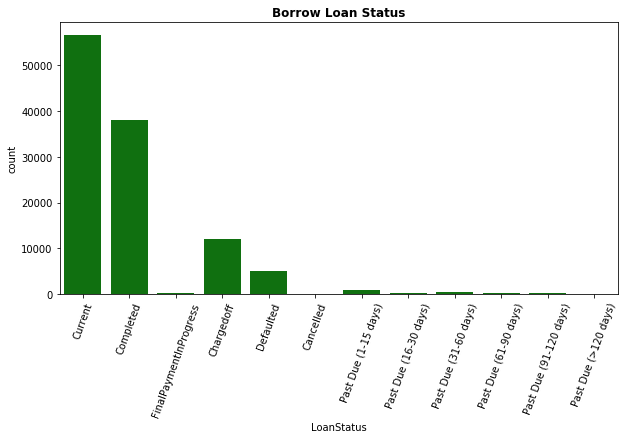

In [16]:
# Let's start by looking at the status of the loans
plt.figure(figsize=[10, 5])
sb.countplot(data=loans_df, x='LoanStatus', color='green');
plt.xticks(rotation=70);
plt.title('Borrow Loan Status', fontweight='bold');

We see behind that most of them (loans) are in progress, followed by those in completed status.

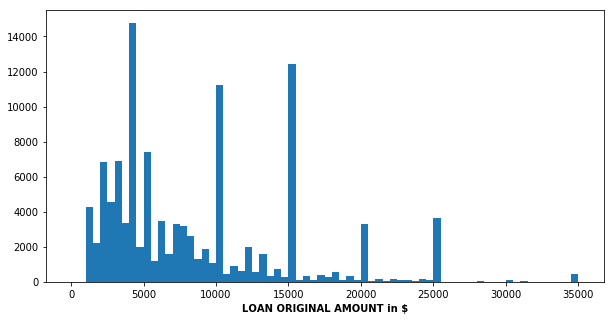

In [17]:
# Let's have a look on a second interesting variable: LoanOriginalAmount
binsize = 500
bins = np.arange(0, loans_df['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loans_df, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LOAN ORIGINAL AMOUNT in $',fontweight='bold')
plt.show()

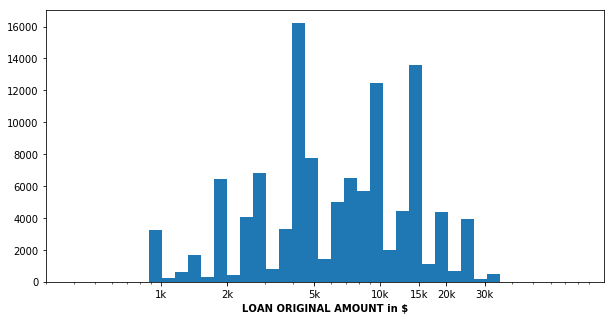

Mean loan amount:  $ 8337.01


In [18]:
# there's some long tail in the distribution, so let's put it on a log scale instead
loan_mean = loans_df.LoanOriginalAmount.mean()
log_binsize = 0.055
bins = 12 ** np.arange(2.4, np.log10(loans_df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data =loans_df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 1.5e4, 2e4, 3e4], ['1k', '2k', '5k', '10k', '15k', '20k', '30k'])
plt.xlabel('LOAN ORIGINAL AMOUNT in $',fontweight='bold')
plt.show()
print('Mean loan amount:  $ {:0.2f}'.format(loan_mean))

On a logarithmic scale we can see from the outset that the loan amounts are highly concentrated at 10,000, 15,000 and in the range of 4,000 and 5,000. 
> It would be interesting to see what types of loans correspond to these peaks.

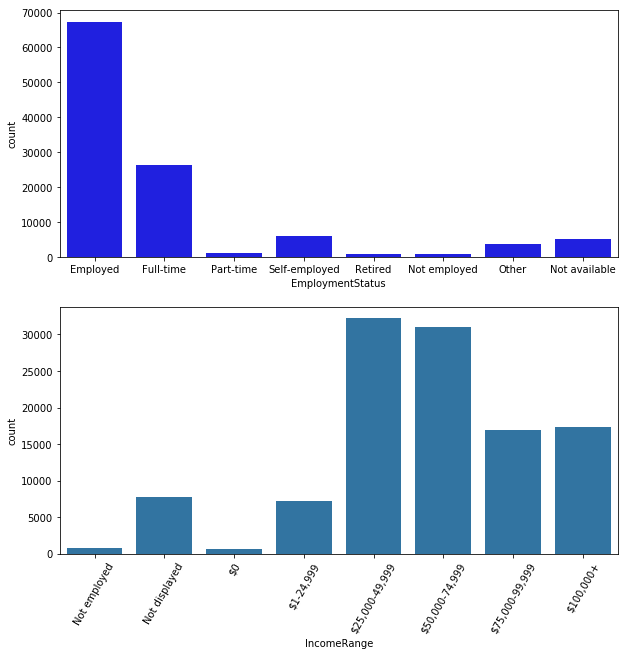

In [19]:
# let's plot together the remaining ordinal variable to get an idea of the distribution.

fig, ax = plt.subplots(nrows=2, figsize = [10,10])

default_color = sb.color_palette()[0]
sb.countplot(data = loans_df, x = 'EmploymentStatus', color = 'blue', ax = ax[0])
sb.countplot(data = loans_df, x = 'IncomeRange', color = default_color, ax = ax[1]);
plt.xticks(rotation=60);

plt.show()

In our first plot, we see that most of the borrowers are Employed
We see in the second graph that the ordered incomes are highly concentrated in the 25,000 to 75,000 range

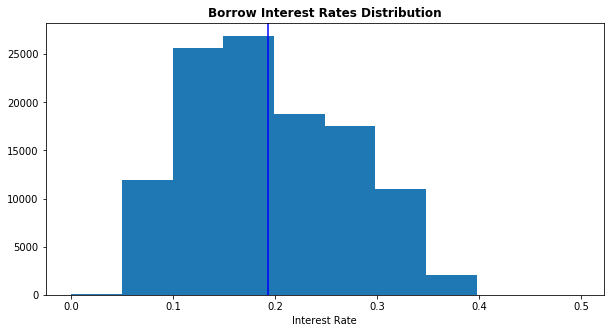

The rate mean is:  0.19


In [20]:
borrower_rate_mean = loans_df.BorrowerRate.mean()
plt.figure(figsize=[10, 5])
plt.hist(data = loans_df, x = 'BorrowerRate')
plt.xlabel('Interest Rate');
plt.axvline(x=borrower_rate_mean, color='b');
plt.title('Borrow Interest Rates Distribution', fontweight='bold');
plt.show()

print('The rate mean is:  {:0.2f}'.format(borrower_rate_mean))

The distribution of borrowers' interest rates is skewed, showing that the majority of borrowers are involved in high-interest loans.

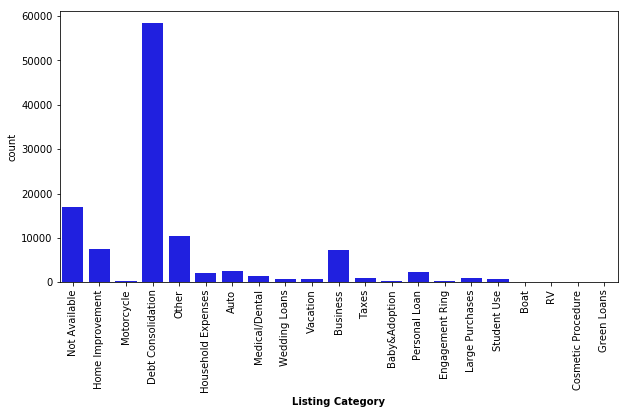

In [21]:
plt.figure(figsize=[10, 5])
sb.countplot(data=loans_df, x='ListingCategoryAlpha', color='blue');
plt.xticks(rotation=90);
plt.xlabel('Listing Category',fontweight='bold');

The majority of the loans are for debt consolidation

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> At the outset, I highlighted the loan statuses, as a way to get an overall view of the distribution of the main question in our data.
Then I made a histogram of the loan amounts that I transformed into a logarithmic scale because in its origin it was asymmetrical. The data appeared bimodal after the logarithmic transformation. There are peaks at the loan amounts of 4,000, 10,000, and 15,000. with an average of about 8,300. So it would be interesting to see what types of loans are associated with these amounts that stand out as peaks.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Columns that were not needed for the analysis were removed to make the dataset manageable. I changed some of the data types to datetime or categorical as needed and created variables of the ordered categorical data types (IncomeRange, EmploymentStatus, and LoanStatus) as needed to understand the data.
I did not notice any particularly inappropriate distributions, but I think it would be interesting to look further into the characteristics that influence borrow rates.

## Bivariate Exploration

We'll start by ploting correlation matrice on the numeric and categoric variables to determine variables that most impact each other.

In [22]:
#Let's look at relationships between variables.
numeric_vars = ['BorrowerRate', 'OpenRevolvingAccounts', 'AmountDelinquent', 'DebtToIncomeRatio', 
                'StatedMonthlyIncome', 'LoanOriginalAmount','Investors','MonthlyLoanPayment']
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'ListingCategoryAlpha', 'IncomeRange']

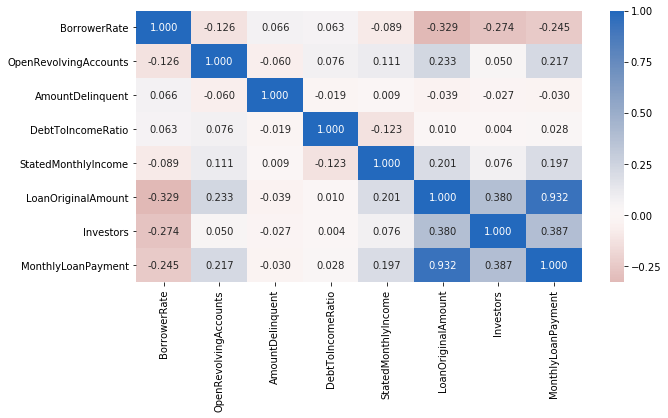

In [23]:
#Correlations between numeric variables
plt.figure(figsize = [10, 5])
sb.heatmap(loans_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

Strongest correlation seems to be between LoanOriginalAmount and BorrowRate.

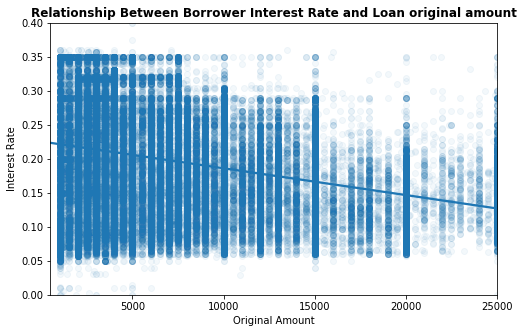

In [24]:
plt.figure(figsize=[8, 5])
sb.regplot(data=loans_df, x='LoanOriginalAmount', y="BorrowerRate", truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.xlim(500, 25000);
plt.ylim(0, .4);
plt.xlabel('Original Amount');
plt.ylabel('Interest Rate');
plt.title('Relationship Between Borrower Interest Rate and Loan original amount', fontweight='bold');

The scatter plot appears to show some negative relationship between the initial loan amount and the borrower's interest rate. As the initial loan amount increases, the interest rate tends to decrease.

Let's now draw a grid of box plots to get an overview of the influence of categorical variables on borrower interest rates and loan amounts. 

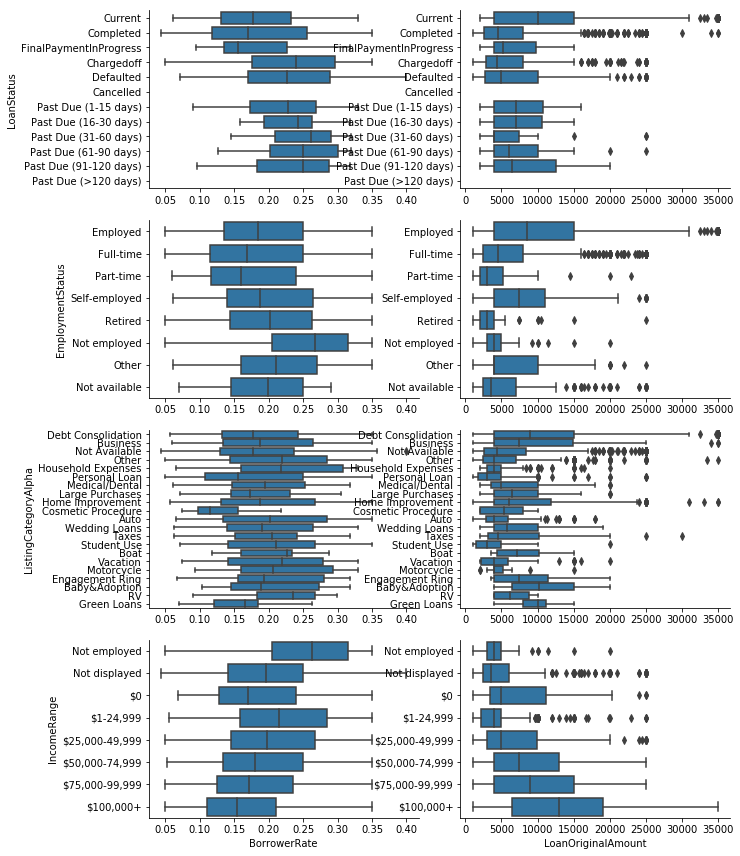

In [25]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)


    
loans_df_samp = loans_df.sample(n=8000, replace = False)
plt.figure(figsize = [10, 10]);
g = sb.PairGrid(data = loans_df_samp, y_vars = categoric_vars , x_vars = ['BorrowerRate', 'LoanOriginalAmount'], 
                size = 3, aspect = 1.5);
g.map(boxgrid);

We see from these graphs that the "Cosmetic intervention" category has a high average interest rate followed by household expenses. 
We also see a relationship with a higher interest rate for the "Unemployed" category and for the "1-24,999" category. Debt consolidation and adopting a child seem to represent the highest loan amounts, and the more money people earn, the higher the loan seems to be.

Finally, let's look at relationships between the three categorical features.

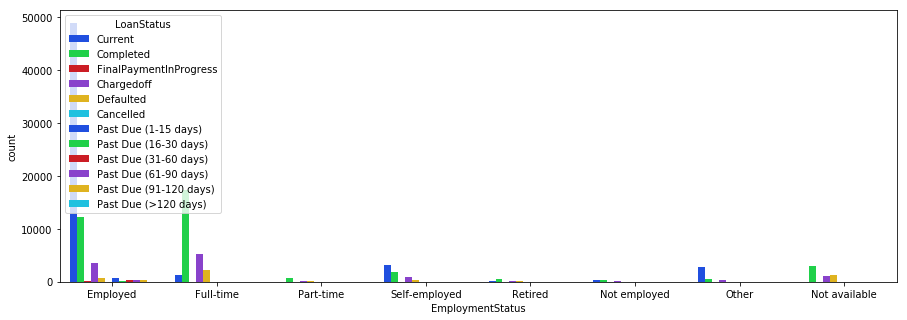

In [26]:
# subplot 1: 'LoanStatus' vs 'EmploymentStatus'
plt.figure(figsize = [15, 5])
sb.countplot(data = loans_df, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'bright');
#plt.xticks(rotation=60);

plt.show()

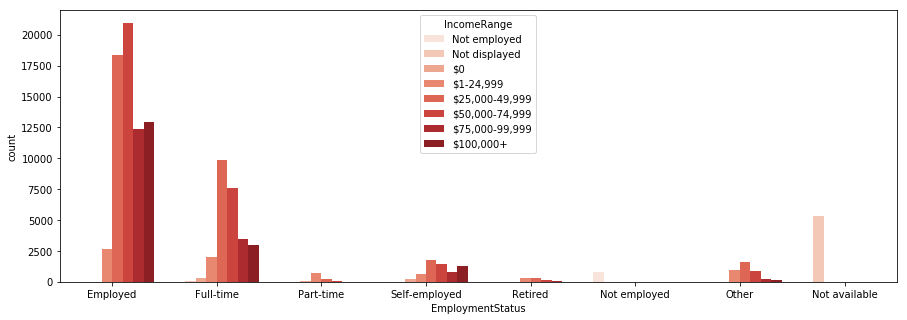

In [27]:
# subplot 2: 'IncomeRange' vs'EmploymentStatus'
plt.figure(figsize = [15, 5])
sb.countplot(data = loans_df, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Reds');

plt.show()

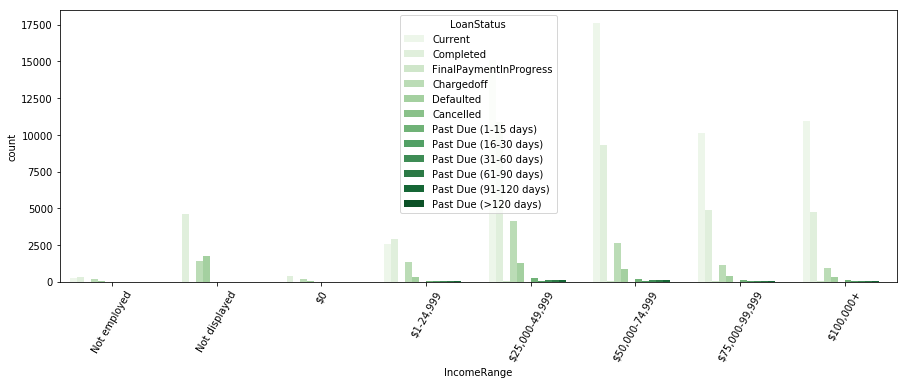

In [28]:
# subplot 3: 'IncomeRange' vs 'LoanStatus'
plt.figure(figsize = [15, 5])
sb.countplot(data = loans_df, x = 'IncomeRange', hue = 'LoanStatus', palette = 'Greens');
plt.xticks(rotation=60);

plt.show()

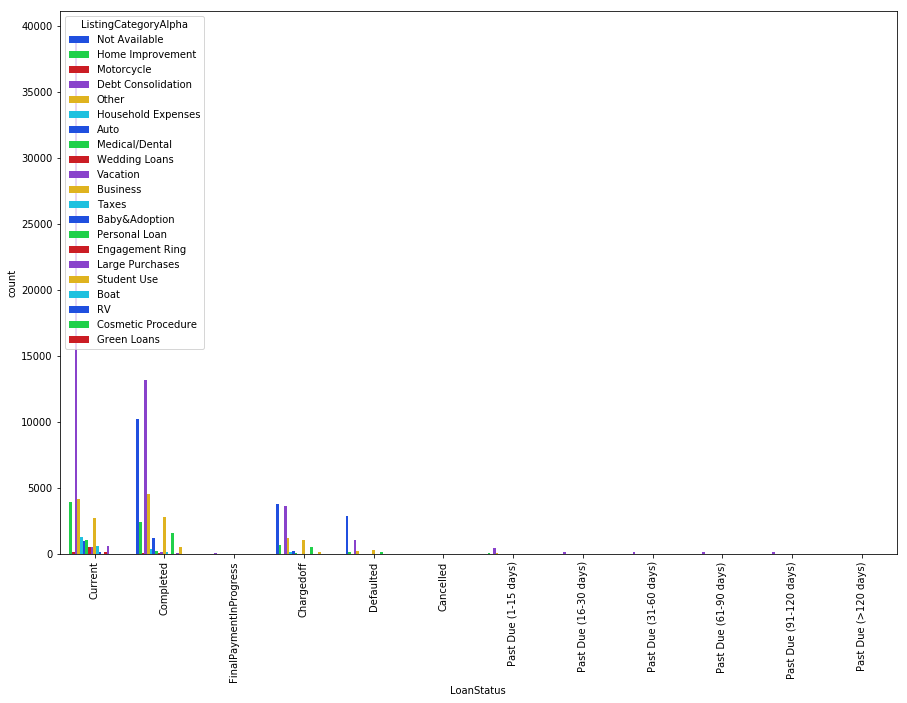

In [29]:
# subplot 3: 'IncomeRange' vs 'LoanStatus'
plt.figure(figsize = [15, 10])
sb.countplot(data = loans_df, x = 'LoanStatus', hue = 'ListingCategoryAlpha', palette = 'bright')
plt.xticks(rotation=90);

plt.show()

In [30]:
#Interested in what causes defaults or past due status.
#First will need to create a dataframe holding only those rows of data.
sub_variables = ['Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (31-60 days)',
                                             'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (16-30 days)', 
                                              'Past Due (>120 days)']
loans_sub = loans_df.loc[loans_df['LoanStatus'].isin(sub_variables)]
loans_sub.LoanStatus.value_counts()

Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
Past Due (>120 days)         16
Cancelled                     0
FinalPaymentInProgress        0
Completed                     0
Current                       0
Name: LoanStatus, dtype: int64

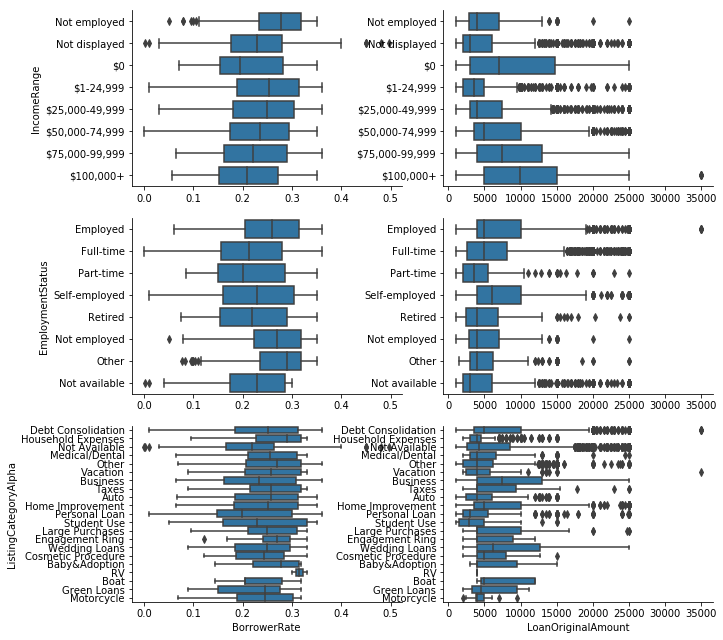

In [31]:
# Let's look at the relationships specifically for Defaulted and Past Due Loans with regards to 
# Original Loan Amount, Borrower Interest Rate, and Categorical Variables.
plt.figure(figsize = [10, 10]);
g = sb.PairGrid(data = loans_sub, y_vars = ['IncomeRange', 'EmploymentStatus', 'ListingCategoryAlpha'] , 
                x_vars = ['BorrowerRate', 'LoanOriginalAmount'], size = 3, aspect = 1.5)
g.map(boxgrid)

plt.show()

The results are similar to those obtained for the full data set. 

It would be more interesting to parallel the loan statuses with the original loan amount and interest rate to allow a focus on how borrower interest rates and loan amounts affect the loan outcome.

In [32]:
#Let's have a look at the means for the two data sets
BorrowerRate_mean = loans_df.BorrowerRate.mean()
LoanAmount_mean = loans_df.LoanOriginalAmount.mean()
BorrowerRate_mean_sub = loans_sub.BorrowerRate.mean()
LoanAmount_mean_sub = loans_sub.LoanOriginalAmount.mean()

print('DataSet Loan Amount mean:  $ {:0.2f}'.format(LoanAmount_mean))
print('DataSet borrower interest rate mean:  {:0.2f}'.format(BorrowerRate_mean))
print('')
print('Loan amount mean for only defaulted/overdue loans:  $ {:0.2f}'.format(LoanAmount_mean_sub))
print('Borrower interest rate mean for only defaulted/overdue loans:  {:0.2f}'.format(BorrowerRate_mean_sub))

DataSet Loan Amount mean:  $ 8337.01
DataSet borrower interest rate mean:  0.19

Loan amount mean for only defaulted/overdue loans:  $ 6623.51
Borrower interest rate mean for only defaulted/overdue loans:  0.23


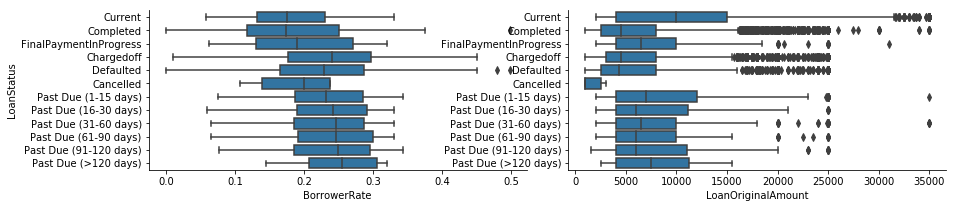

In [33]:
plt.figure(figsize = [25, 25]);
g = sb.PairGrid(data = loans_df, y_vars = 'LoanStatus' , 
                x_vars = ['BorrowerRate', 'LoanOriginalAmount'], size = 3, aspect = 2);
g.map(boxgrid);


We don't see much difference between the categories of loan status other than noting that the gap between unpaid and defaulted loans is substantial. 
The second graph shows that the larger the loan, the greater the chance of staying current on payments.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It is surprising to see on the heat map above that the strongest correlation was a negative relationship between borrower interest rates and initial loan amount while there was not really a strong correlation between the numerical variables.

> After comparing borrower interest rates to the categorical variables, the income categories "Unemployed" or "1-24,999" showed a relationship with a higher borrower interest rate. The average interest rate by loan type is highest for cosmetic procedures, followed by household expenses.

> Interesting to see that the average loan amount for the defaulted or overdue dataframe was less than the dataframe as a whole but the interest rate for those loans was higher by .04.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Surprisingly, but not really mystical, those employed full time have the highest rate of default.
The highest loan amounts are concentrated in debt consolidation and business and the higher is the income, the higher the loan appears to be. Completed and current loans are dominated by the "home improvement" category, which is the most frequently distributed loan, despite employment status. 

## Multivariate Exploration

Let's look in detail at how the loan amount and interest rate affect the final outcome of the loan.

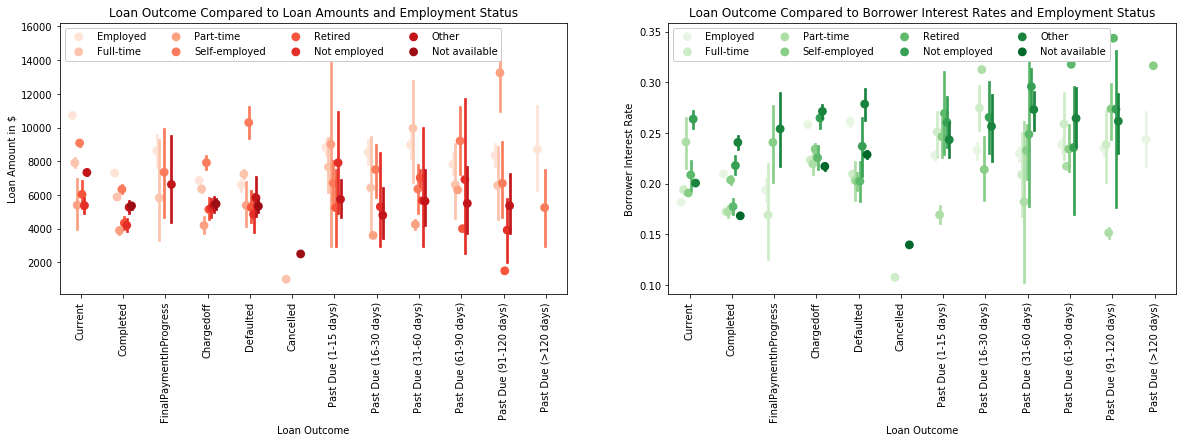

In [34]:
# relationship of LoanStatus against LoanAmount and BorrowerRate
fig, ax = plt.subplots(ncols=2, figsize = [20,5])
sb.pointplot(data = loans_df, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Reds', linestyles = '', dodge = 0.4, ax=ax[0])
ax[0].set_title('Loan Outcome Compared to Loan Amounts and Employment Status')
ax[0].set_ylabel('Loan Amount in $')
ax[0].set_xlabel('Loan Outcome')
ax[0].legend(loc=2, ncol=4, framealpha=1);
ax[0].tick_params('x', rotation=90);
sb.pointplot(data = loans_df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'EmploymentStatus',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1])
ax[1].set_title('Loan Outcome Compared to Borrower Interest Rates and Employment Status')
ax[1].set_ylabel('Borrower Interest Rate')
ax[1].set_xlabel('Loan Outcome')
ax[1].legend(loc=2, ncol=4, framealpha=1);
ax[1].tick_params('x', rotation=90);

Here, cancelled loans tend to have lower amounts and lower interest rates. Certainly because they don't have much impact on the investor.
Through this presentation, it can be seen that delinquent loans tend to have a greater difference in loan amount and loan interest rate.

Let's create a grid of scatter plots for an overview of the relationships between borrower interest rates, Loan Original Amount, and income.

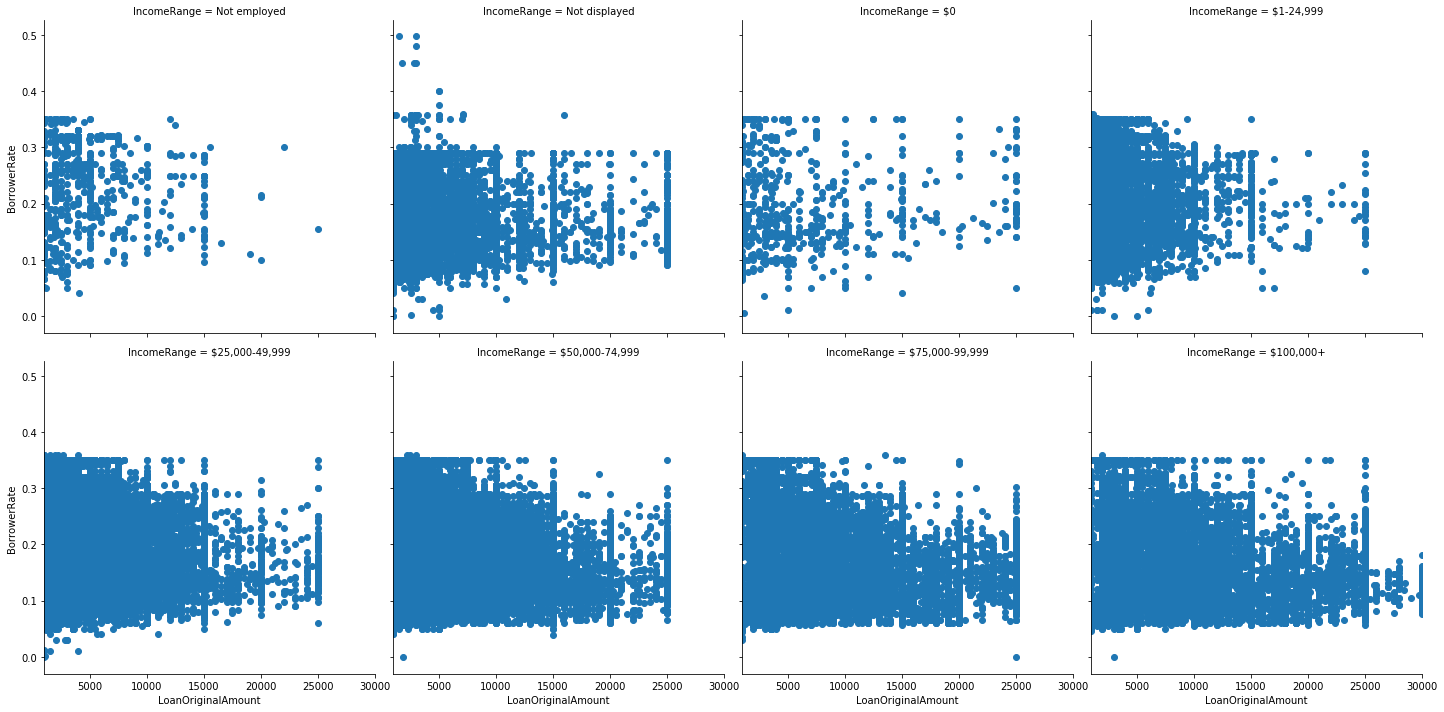

In [35]:
#Create a plot of the relationship between BorrowerRate, LoanOriginalAmount, and IncomeRange
g = sb.FacetGrid(data = loans_df, col='IncomeRange', size=5, col_wrap=4)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate');
plt.xlim(1000, 30000);

Let's create a grid of scatter plots for an overview of the relationships between borrower interest rates, Loan Original Amount, and Listing Category.

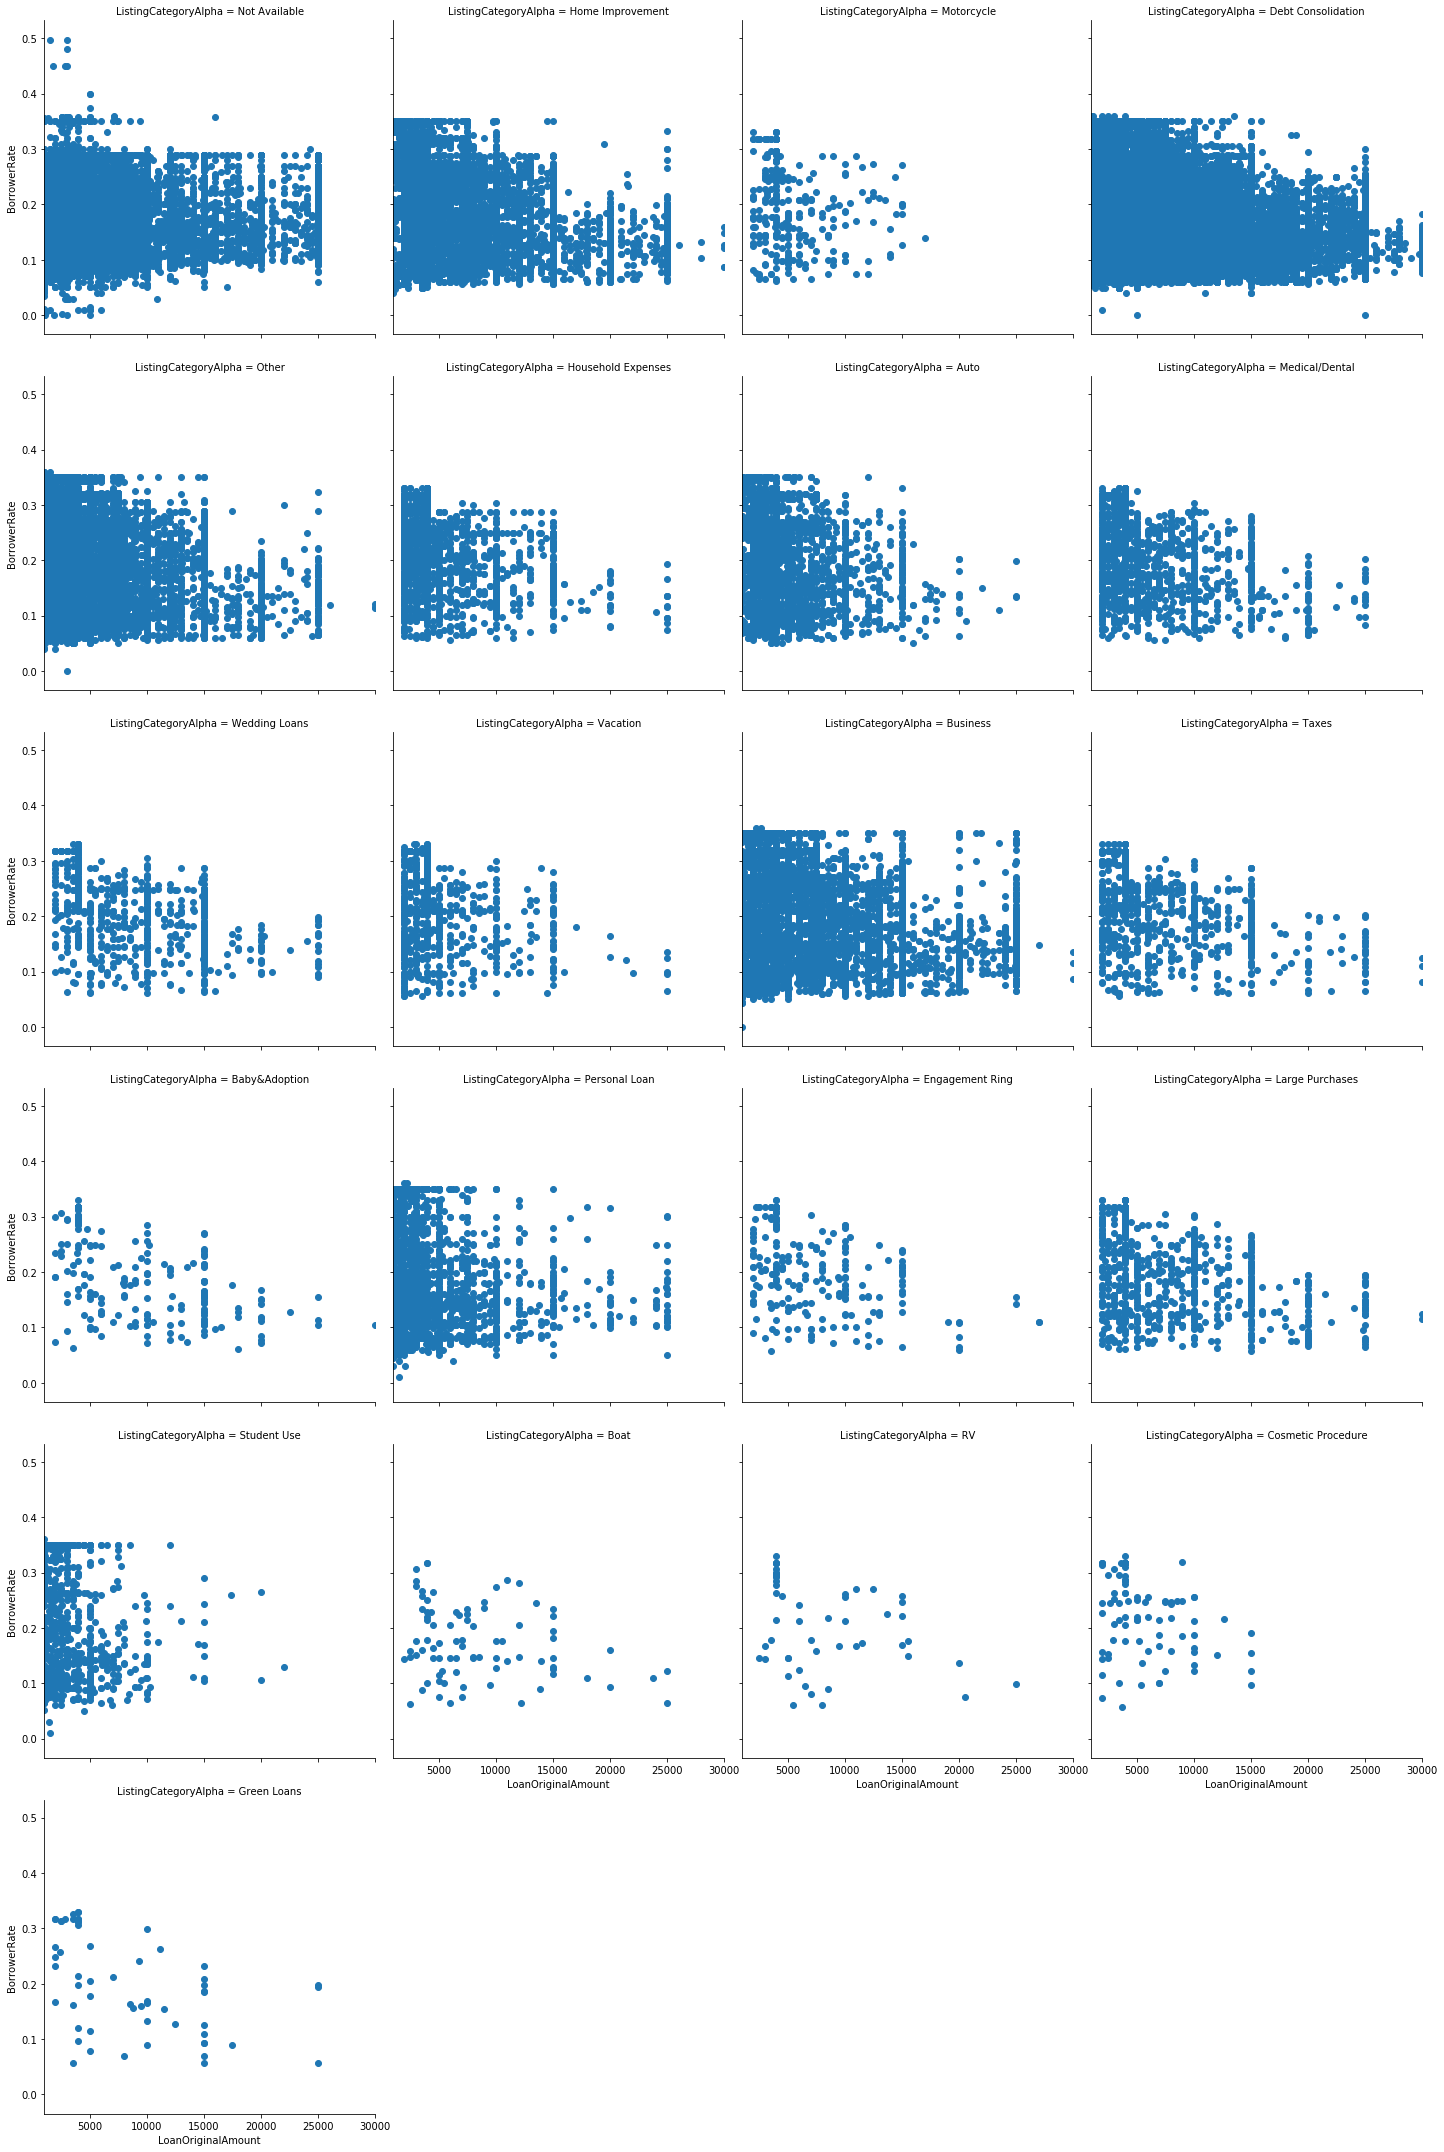

In [36]:
g = sb.FacetGrid(data = loans_df, col='ListingCategoryAlpha', size=5, col_wrap=4)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate');
plt.xlim(1000, 30000);

We can clearly see how the concentration on the two series of point clouds justifies our analyses made a little earlier.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We see through this analysis that the outcome of a loan is affected by the amount borrowed and the interest rate of the loan and that high interest rate, high value loans seem more likely to go into default. 
As the borrower's credit score increases, the interest rate decreases. Sometimes, the amount of the loan also affects the interest rate.

### Were there any interesting or surprising interactions between features?

> Surprisingly, unemployed people sometimes make large loans and those employed full-time have the highest default rate.

## Conclusions
> We are able to confirm that the factors that most seemed to affect a loan's outcome was the amount of money borrowed and the interest rate of the loan. Higher interest, high value loans seems to be more likely to be past due. Those with jobs have the highest spread in the data, which makes sense since I assume that those with jobs are more likely to apply for and receive loans. Employed individuals had the highest spread in the data.

> In the Listing category provided, Debt consolidation and business seem to account for the highest loan amounts and the more money people made, the higher the loan appears to be.

> The factors that most affected the borrower's interest rate were narrowed down by the correlation heat matrix. None of the features had a strong correlation but the highest was between Loan original amount and Borrow Rate. As the Loan original amount increases, the interest rate decreases.